In [1]:
from scipy.stats import norm
import seaborn as sns
from math import exp,sqrt
import numpy as np
import pandas as pd
from matplotlib import cm
import pandas as pd
from scipy import stats
from scipy.stats import zscore
from scipy.stats import ttest_ind



import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import SVG

In [40]:
df = pd.read_csv("/Users/terlau/eyemem_behav_study_1.csv", skiprows=range(1, 9)) 

lst = df.columns.tolist()
col_lst = ['dprime_1', 'dprime_2', 'dprime_3', 'dprime_4', 'dprime_5', 
           'RT_1','RT_2','RT_3','RT_4','RT_5','criterion_1','criterion_2',
           'criterion_3','criterion_4','criterion_5','group']
df = df.loc[:,col_lst]
print(df.index[df.isnull().all(1)])
df_d = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
#df = df.dropna(axis = 0, how = 'all')

Int64Index([2, 10, 31, 36, 39, 46, 47, 61, 64], dtype='int64')


In [41]:
col_d = df_d.loc[: , "dprime_1":"dprime_5"]
col_r = df_d.loc[: , "RT_1":"RT_5"]
col_c = df_d.loc[: , "criterion_1":"criterion_5"]

In [42]:
df_d['avg_dprime'] = col_d.mean(axis=1)
df_d['avg_RT'] = col_r.mean(axis=1)
df_d['avg_criterion'] = col_c.mean(axis=1)
df_d

<ipython-input-42-bbfae033417c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d['avg_dprime'] = col_d.mean(axis=1)
<ipython-input-42-bbfae033417c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d['avg_RT'] = col_r.mean(axis=1)
<ipython-input-42-bbfae033417c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,dprime_1,dprime_2,dprime_3,dprime_4,dprime_5,RT_1,RT_2,RT_3,RT_4,RT_5,criterion_1,criterion_2,criterion_3,criterion_4,criterion_5,group,avg_dprime,avg_RT,avg_criterion
0,3.002172,2.831685,2.576005,3.289707,3.289707,0.740367,0.754833,0.795833,0.734000,0.780633,-0.000000,0.229011,0.177231,2.220446e-16,2.220446e-16,young,2.997855,0.761133,0.081248
1,2.831685,2.615583,3.110087,2.532000,2.615583,0.663300,0.817448,0.816100,0.837767,0.804600,0.229011,0.157442,-0.089810,3.788535e-01,1.574422e-01,young,2.740988,0.787843,0.166588
3,1.898201,2.067035,2.755625,1.941988,1.541499,1.087700,1.435567,1.156586,1.295200,1.321897,-0.695753,-0.467569,-0.267041,-1.793554e-01,-3.400222e-01,old,2.040870,1.259390,-0.389948
4,3.145940,1.610907,2.486475,0.000000,2.075581,1.252367,1.558800,1.155000,0.000000,1.543679,-0.071884,1.028461,0.401616,0.000000e+00,6.070632e-01,old,1.863780,1.101969,0.393051
5,2.612908,2.611858,3.145940,3.289707,1.886665,0.925700,0.960033,0.863867,1.058133,1.338643,0.119623,0.195157,0.071884,2.220446e-16,-2.070167e-01,old,2.709416,1.029275,0.035929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2.486475,2.486475,2.568656,-0.336999,1.802164,1.231793,1.274000,1.226500,1.449842,1.389778,-0.401616,0.401616,0.216758,8.484768e-02,7.437715e-01,young,1.801354,1.314383,0.209075
89,2.436492,2.206908,2.999354,2.755625,3.002172,0.808933,0.698333,0.682467,0.841000,0.813267,0.426608,-0.083378,-0.034443,-2.670410e-01,-0.000000e+00,young,2.680110,0.768800,0.008349
90,2.352380,2.966320,2.831685,2.486475,2.342707,1.181621,1.448207,1.040100,1.359241,1.483893,0.289044,0.017926,0.229011,4.016162e-01,3.297324e-01,old,2.595913,1.302612,0.253466
91,2.178342,2.267779,1.272349,1.094968,1.952393,1.307897,1.408357,1.203852,1.239778,1.430333,-0.021601,-0.510964,-0.205447,2.941371e-01,1.345752e-01,old,1.753166,1.318043,-0.061860


In [ ]:
df_d.groupby('group').mean().transpose().plot.bar()

plt.show()

In [66]:
def age_grouping(df):
    ya_df = df.loc[df['age'] == 0]
    oa_df = df.loc[df['age'] == 1]
    print(ya_df.describe())
    print(oa_df.describe()) 
    #print(ya_df.head())
    #print(oa_df.head())
    return ya_df, oa_df

In [43]:
ya_df, oa_df = age_grouping(df_d)

        dprime_1   dprime_2   dprime_3   dprime_4   dprime_5       RT_1  \
count  42.000000  42.000000  42.000000  42.000000  42.000000  42.000000   
mean    2.928907   2.689180   2.898357   2.744590   2.813503   0.938864   
std     0.334303   0.380857   0.301589   0.657072   0.526641   0.164468   
min     2.133630   1.733697   2.206908  -0.336999   0.854883   0.663300   
25%     2.639793   2.458706   2.611962   2.580738   2.615583   0.808583   
50%     3.000763   2.734025   2.963259   2.755625   3.002172   0.935067   
75%     3.262024   3.002172   3.145940   3.178974   3.178974   1.055825   
max     3.289707   3.178974   3.289707   3.289707   3.289707   1.268536   

            RT_2       RT_3       RT_4       RT_5   criterion_1  criterion_2  \
count  42.000000  42.000000  42.000000  42.000000  4.200000e+01    42.000000   
mean    1.045796   0.935043   1.080437   1.052068  8.933841e-02     0.039098   
std     0.173408   0.181474   0.192659   0.206568  1.988521e-01     0.225387   
min 

In [36]:
t, p = stats.ttest_ind(ya_df['avg_dprime'],oa_df['avg_dprime'])
print("DPrime", t, p)
t1, p1 = stats.ttest_ind(ya_df['avg_RT'],oa_df['avg_RT'])
print("RT", t1, p1)
t2, p2 = stats.ttest_ind(ya_df['avg_criterion'],oa_df['avg_criterion'])
print("Criterion", t2, p2)

DPrime 4.423150248415635 2.9636593723466247e-05
RT 2.5895623335885944 0.011368413463749089
Criterion 2.7568349181725806 0.007191802956647462


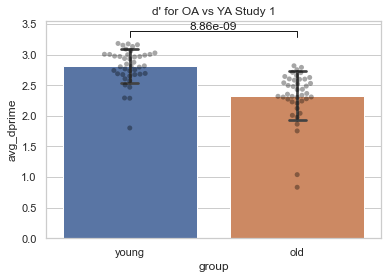

In [24]:
sns.set(style="whitegrid")


sns.barplot(x="group", y="avg_dprime", data=df_d, capsize=.1, ci="sd")
sns.swarmplot(x="group", y="avg_dprime", data=df_d, color="0", alpha=.35)

x1, x2 = 0, 1   
y, h, col = df_d.avg_dprime.max()+0.1,0.1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, '8.86e-09', ha='center', va='bottom', color=col)
plt.title("d' for OA vs YA Study 1")
plt.savefig('/Users/terlau/dprime_study1_eyemem1.png')
plt.show()


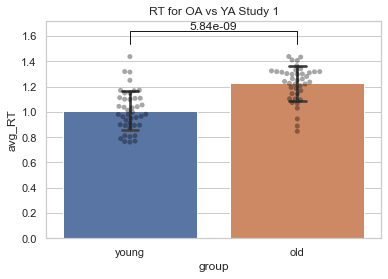

In [25]:
sns.barplot(x="group", y="avg_RT", data=df_d, capsize=.1, ci="sd")
sns.swarmplot(x="group", y="avg_RT", data=df_d, color="0", alpha=.35)

x1, x2 = 0, 1   
y, h, col = df_d.avg_RT.max()+0.1,0.1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, '5.84e-09', ha='center', va='bottom', color=col)
plt.title("RT for OA vs YA Study 1")
plt.savefig('/Users/terlau/RT_study1_eyemem1.png')
plt.show()

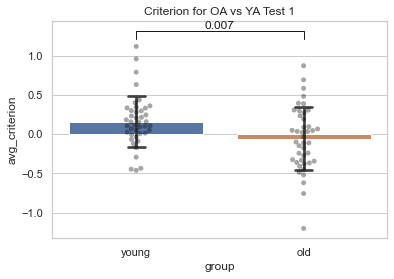

In [37]:
sns.set(style="whitegrid")
sns.barplot(x="group", y="avg_criterion", data=df_d, capsize=.1, ci="sd")
sns.swarmplot(x="group", y="avg_criterion", data=df_d, color="0", alpha=.35)

x1, x2 = 0, 1   
y, h, col = df_d.avg_criterion.max()+0.1,0.1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, '0.007', ha='center', va='bottom', color=col)
plt.title("Criterion for OA vs YA Test 1")
plt.savefig('/Users/terlau/criterion_test1_eyemem1.png')
plt.show()

In [70]:
df = pd.read_csv("/Users/terlau/LNDG/EyeMem/EyeMem_1/DDM/EyeMem_hddm_study.csv")
df


,subj_idx,category,stim,response,accuracy,rt,age
0,9,3,1,2.0,1,0.971,0
1,9,3,1,1.0,0,1.367,0
2,9,3,0,1.0,1,0.989,0
3,9,3,1,2.0,1,0.692,0
4,9,3,0,1.0,1,0.806,0
...,...,...,...,...,...,...,...
12366,101,3,1,1.0,1,0.645,1
12367,101,3,1,1.0,1,1.858,1
12368,101,3,0,2.0,1,0.759,1
12369,101,3,1,1.0,1,0.584,1


In [ ]:
# Clean from Invalid Reaction Times 
df=df.loc[~df['rt'].isnull()]
print(np.unique(df['response']))
df_age = df.groupby(['age', 'subj_idx'])

In [73]:
df_ya, df_oa = age_grouping(acc_df)

         subject   age   accuracy
count  42.000000  42.0  42.000000
mean   57.738095   0.0   0.928731
std    25.922078   0.0   0.037498
min     9.000000   0.0   0.778523
25%    40.250000   0.0   0.912752
50%    60.500000   0.0   0.929530
75%    76.750000   0.0   0.953020
max    98.000000   0.0   0.979866
          subject   age   accuracy
count   42.000000  42.0  42.000000
mean    54.119048   1.0   0.856065
std     29.204245   0.0   0.084630
min     12.000000   1.0   0.423729
25%     28.250000   1.0   0.845638
50%     44.500000   1.0   0.872483
75%     83.500000   1.0   0.899329
max    101.000000   1.0   0.926174


In [74]:
t, p = stats.ttest_ind(df_ya['accuracy'], df_oa['accuracy'])
print(t,p)

5.087548978864134 2.2586744407715925e-06


In [8]:
print(df_ya['accuracy'].mean())
df_oa['accuracy'].mean()

0.7338414871276348


0.6669707335613835

In [46]:
# Create lists for the plot
fits = ['YA', 'OA']
x_pos = np.arange(len(fits))
CTEs = [df_ya['accuracy'].mean(), df_oa['accuracy'].mean()]
error = [np.std(df_ya['accuracy']), np.std(df_oa['accuracy'])]

NameError: name 'x_pos' is not defined

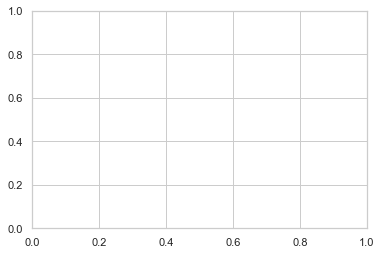

In [45]:
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
x1, x2 = 0, 1   
y, h, col = df['accuracy'].max()+0.2,0.03, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, '3.06e-30', ha='center', va='bottom', color=col)
ax.set_xticks(x_pos)
ax.set_xticklabels(fits)
ax.set_title("Accuracy for YA vs OA Test 1")
ax.yaxis.grid(True)


plt.tight_layout()
plt.show()

In [30]:
df

,subj_idx,category,stim,response,accuracy,rt,age
0,9,3,1,2.0,1,0.739,0
1,9,3,1,2.0,1,0.859,0
2,9,3,1,1.0,0,0.716,0
3,9,3,0,1.0,0,1.153,0
4,9,3,0,2.0,0,0.665,0
...,...,...,...,...,...,...,...
26007,101,3,0,2.0,1,1.008,1
26008,101,3,1,1.0,1,0.838,1
26009,101,3,1,1.0,1,0.609,1
26010,101,3,0,1.0,0,0.712,1


In [71]:
SubjectList = np.unique(df['subj_idx'])
acc = []
age = []
sub_id = []
for sub in SubjectList:
   # print(sub)
    sub_id.append(sub)
    sub_df = df[df['subj_idx'] == sub]
    age.append(int(sub_df['age'].mean()))
    acc.append(sub_df['accuracy'].mean())

acc_dict= {'subject': sub_id, 'age': age, 'accuracy': acc}
acc_df = pd.DataFrame(acc_dict)

In [72]:
acc_df

,subject,age,accuracy
0,9,0,0.953020
1,10,0,0.919463
2,12,1,0.832215
3,13,1,0.805195
4,14,1,0.919463
...,...,...,...
79,97,0,0.778523
80,98,0,0.912752
81,99,1,0.899329
82,100,1,0.798658


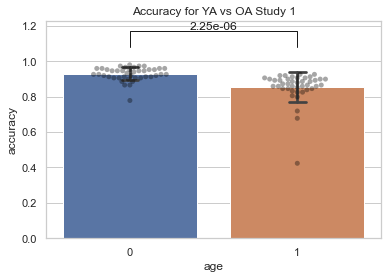

In [78]:
sns.barplot(x="age", y="accuracy", data=acc_df, capsize=.1, ci="sd")
sns.swarmplot(x="age", y="accuracy", data=acc_df, color="0", alpha=.35)

x1, x2 = 0, 1   
y, h, col = acc_df['accuracy'].max()+0.1,0.09, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, '2.25e-06', ha='center', va='bottom', color=col)
plt.title('Accuracy for YA vs OA Study 1')
#plt.savefig('/Users/terlau/criterion_study1_eyemem1.png')
plt.show() 

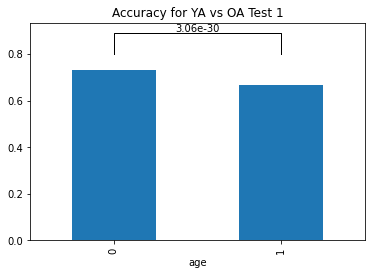

In [11]:
df.groupby('age')['accuracy'].mean().plot(kind='bar')
x1, x2 = 0, 1   
y, h, col = df['accuracy'].max()-0.2,0.09, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, '3.06e-30', ha='center', va='bottom', color=col)
plt.title("Accuracy for YA vs OA Test 1")
plt.show()

In [ ]:
Z = norm.ppf     
# This function turns 'proportions' into z-scores:
# Z(.5) = 0.0
# Z(.75) = 0.674
# Z(.1581) = -1.0

def sdt(hit_rate, fa_rate):
    """
    This function takes a hit rate and a false alarm rate, and computes d_prime and c
    """
    out = dict()
    out['d_prime'] = Z(hit_rate) - Z(fa_rate)
    out['criterion'] = -(Z(hit_rate) + Z(fa_rate))/2 #bias
    return out


In [ ]:
for sub in SubjectList:
   
    sub_df = df[df['subj_idx'] == sub]
    #print(sub)
    if sub in [40, 45, 48, 56]:
        #print(np.unique(sub_df['stim']))
        continue
    else:
        resp = np.unique(sub_df["response"][(sub_df["stim"] == 1) & (sub_df["accuracy"] == 1)])
        print(resp[0])
        sub_df['resp']=np.where(sub_df["response"] == resp[0],1,0)
    print(sub_df)
    sub_df['hit'] = np.where((sub_df['resp'] == 1) & (sub_df['stim']==1), 1, 0)
    sub_df['FA'] = np.where((sub_df['resp'] == 1) & (sub_df['stim']==0), 1, 0)
    
    #hit_rate = sub_df['hit'].value_counts(normalize=True)
    #false_alarm = sub_df['FA'].value_counts(normalize=True)

In [ ]:
def get_rate(df):
    """
    gets a dataframe with subjects and stimulus columns (1 for stim present, 0 for stim absent)
    calculates hit rate and false alarm rate for each subject
    """
    subjects = []
    age = []
    fa = []
    hit = []
    d_prime = []
    c = []
    for name, group in df_age:
        #for sub in df['subj_idx']:
        #print(sub)
        print(name[0], name[1])
        sub = str(name[1])
     
        if sub in ['40', '45', '48', '56']:
            print(sub)
            continue
        else:
            resp = np.unique(group["response"][(group["stim"] == 1) & (group["accuracy"] == 1)])
            print(resp[0])
            group['resp']=np.where(group["response"] == resp[0],1,0)
            group['hit'] = np.where((group['resp'] == 1) & (group['stim']==1), 1, 0)
            group['FA'] = np.where((group['resp'] == 1) & (group['stim']==0), 1, 0)
            hit_rate = group['hit'].value_counts(normalize=True)
            false_alarm = group['FA'].value_counts(normalize=True)
        if len(hit_rate) != 2:
            print("Hit rate", hit_rate)
            hit_rate = 0.00000000000000001
        else:
            print("Hit rate for sub {}".format(sub), hit_rate[1])
            print("FA rate for sub {}".format(sub), false_alarm[1])
            hit_rate = hit_rate[1]
        
        d = sdt(hit_rate, false_alarm[1])
        
        #print(d)
        #print(d['d_prime'])
        subjects.append(sub)
        age.append(name[0])
        hit.append(hit_rate)
        fa.append(false_alarm[1])
        d_prime.append(d['d_prime'])
        c.append(d['c'])
    
    dict_sdt = {'subject':subjects,'group':age,'hit': hit , 'FA': fa, 'd_prime':d_prime , 'Bias':c}
    
    df_sdt = pd.DataFrame(dict_sdt)
    return df_sdt
       
      

In [ ]:
sdt_df = get_rate(df) 
#sdt_df.replace([np.inf, -np.inf], np.nan, inplace=True)
#sdt_df=sdt_df.loc[~sdt_df['d_prime'].isnull()]
sdt_df

In [ ]:
sdt_df.describe()

In [ ]:
df_age = sdt_df.groupby('group')
print(df_age['d_prime'].mean())
print(df_age['hit'].mean())
print(df_age['FA'].mean())
df_age['d_prime'].mean().plot.bar()
plt.show()

In [ ]:
def draw_gauss(m,  s, ax, c, label='', rnge=[-5,5]):
    """
    draws a gaussian at x, with sd s in the specified axis using color c
    """
    x = np.linspace(rnge[0], rnge[1], 1000)
    ax.plot(x, norm.pdf(x, loc=m, scale=s), c=c, label=label)


In [ ]:
# we define some parameters for our example plot using the above function
s = sqrt(mean_diff)
mean_diff = 1.2286973955287714
criterion = 0.7907228625452472


In [ ]:
# First of course make a figure
f, ax = plt.subplots(1, 1, figsize=(16,6))

# and then draw normal distributions
draw_gauss(m=-mean_diff/2, s=s, ax=ax, c='r', label='noise')
draw_gauss(m=mean_diff/2, s=s, ax=ax, c='b', label='signal')

# and, we can also plot 'c', the criterion value in the plot
ax.axvline(x=criterion,  color='k', linestyle='--', label='criterion') 
plt.legend();